In [73]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

FILES_DIR = os.path.abspath('images')

In [74]:
def erosion(image, element):
    result = np.copy(image)

    imageY, imageX = image.shape
    elementY, elementX = len(element), len(element[0])

    centerY, centerX = elementY // 2, elementX // 2
    maxLevel = np.max(element)

    for i in range(imageX):
        for j in range(imageY):
            minimal = 255

            for k in range(-centerX, centerX + 1):
                for l in range(-centerY, centerY + 1):
                    if i + k < 0 or i + k >= imageX:
                        continue
                    if j + l < 0 or j + l >= imageY:
                        continue
                    
                    if element[l + centerY][k + centerX] == maxLevel:
                        minimal = min(minimal, image[j + l][i + k])

            result[j][i] = minimal

    return result

def dilation(image, element):
    result = np.copy(image)

    imageY, imageX = image.shape
    elementY, elementX = len(element), len(element[0])

    centerY, centerX = elementY // 2, elementX // 2
    maxLevel = np.max(element)

    for i in range(imageX):
        for j in range(imageY):
            maximum = 0

            for k in range(-centerX, centerX + 1):
                for l in range(-centerY, centerY + 1):
                    if i + k < 0 or i + k >= imageX:
                        continue
                    if j + l < 0 or j + l >= imageY:
                        continue
                    
                    if element[l + centerY][k + centerX] == maxLevel:
                        maximum = max(maximum, image[j + l][i + k])

            result[j][i] = maximum

    return result

def closing(image, element):
    dilationImage = dilation(image, element)
    erosionImage = erosion(dilationImage, element)

    return erosionImage

def opening(image, element):
    erosionImage = erosion(image, element)
    dilationImage = dilation(erosionImage, element)

    return dilationImage

def showImage(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

def showSaveImage(image, imageName, mode):
    showImage(image)
    cv2.imwrite(f'{FILES_DIR}/morph/exercicio2/{imageName}_{mode}.bmp', image)

Imagem "imageA" Original:


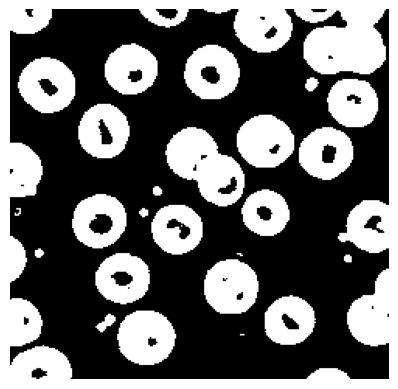

Erosão com [[0, 1, 0], [1, 1, 1], [0, 1, 0]]:


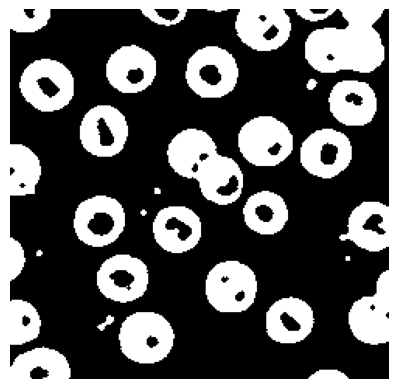

Dilatação com [[0, 1, 0], [1, 1, 1], [0, 1, 0]]:


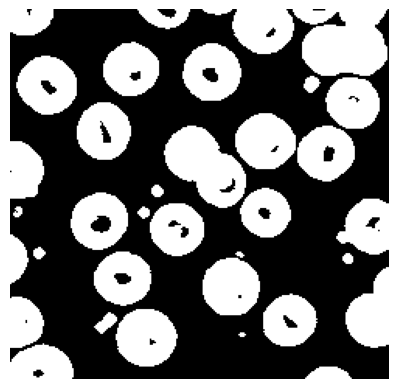

Abertura com [[0, 1, 0], [1, 1, 1], [0, 1, 0]]:


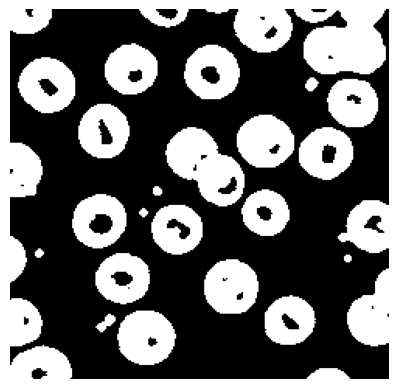

Fechamento com [[0, 1, 0], [1, 1, 1], [0, 1, 0]]:


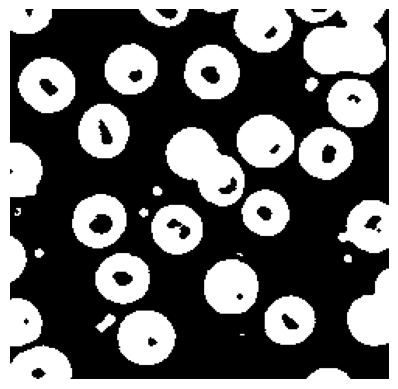

Erosão com [[1, 1, 1], [1, 1, 1], [1, 1, 1]]:


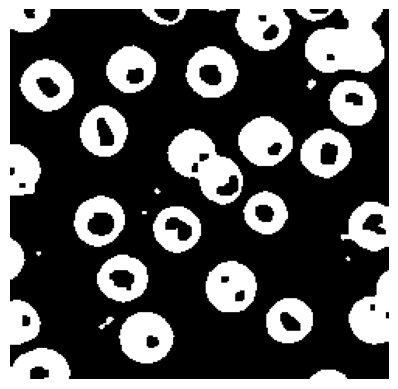

Dilatação com [[1, 1, 1], [1, 1, 1], [1, 1, 1]]:


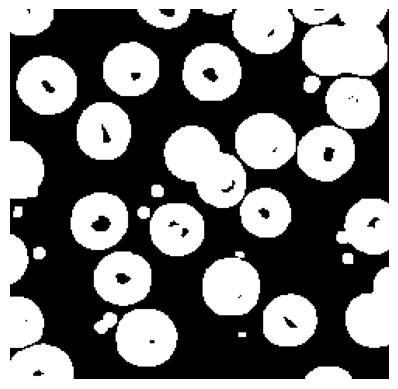

Abertura com [[1, 1, 1], [1, 1, 1], [1, 1, 1]]:


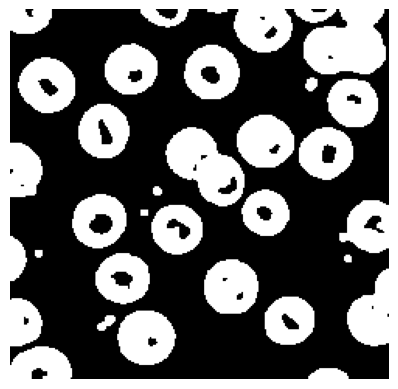

Fechamento com [[1, 1, 1], [1, 1, 1], [1, 1, 1]]:


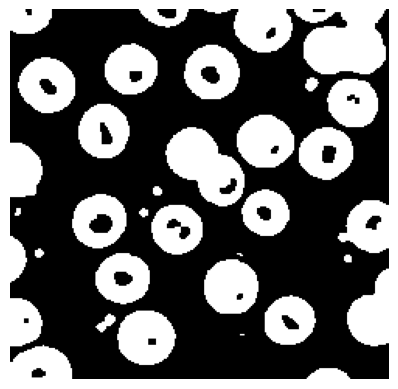

Imagem "imageB" Original:


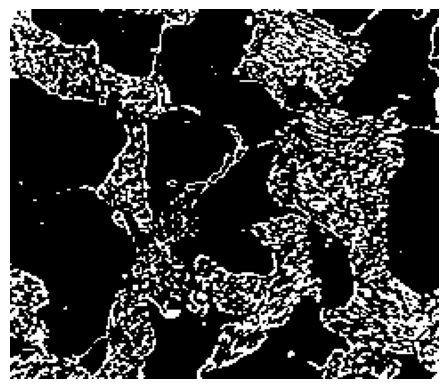

Erosão com [[0, 1, 0], [1, 1, 1], [0, 1, 0]]:


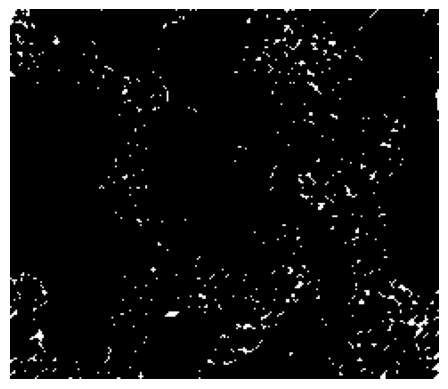

Dilatação com [[0, 1, 0], [1, 1, 1], [0, 1, 0]]:


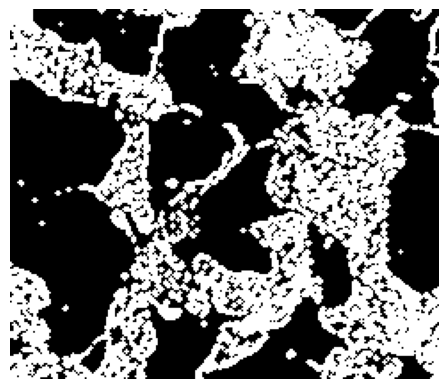

Abertura com [[0, 1, 0], [1, 1, 1], [0, 1, 0]]:


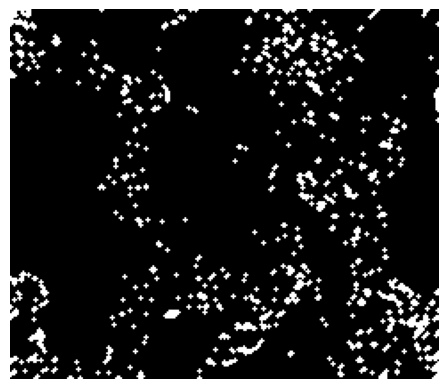

Fechamento com [[0, 1, 0], [1, 1, 1], [0, 1, 0]]:


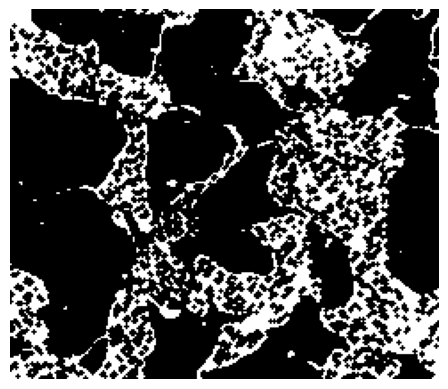

Erosão com [[1, 1, 1], [1, 1, 1], [1, 1, 1]]:


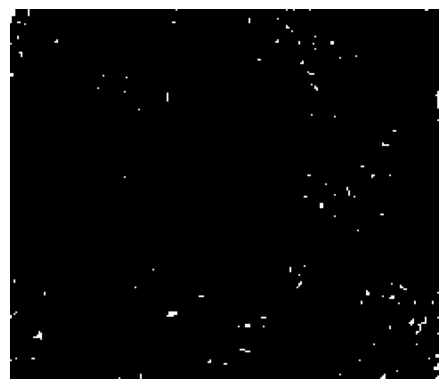

Dilatação com [[1, 1, 1], [1, 1, 1], [1, 1, 1]]:


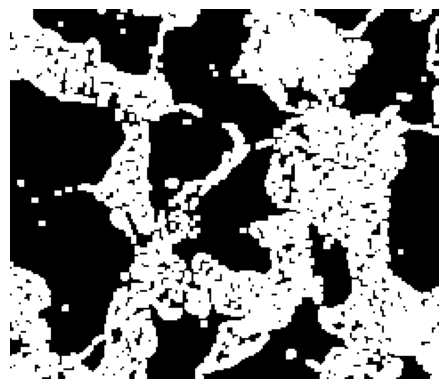

Abertura com [[1, 1, 1], [1, 1, 1], [1, 1, 1]]:


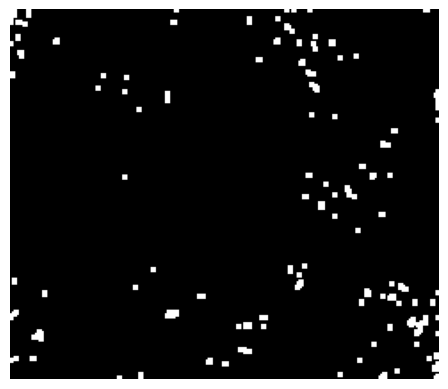

Fechamento com [[1, 1, 1], [1, 1, 1], [1, 1, 1]]:


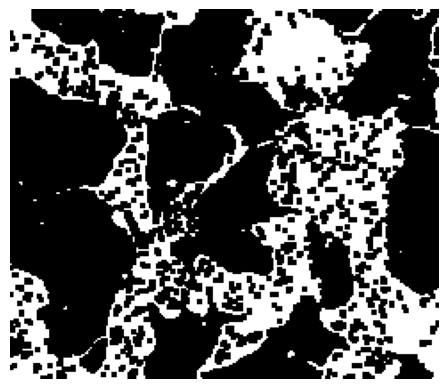

Imagem "imageC" Original:


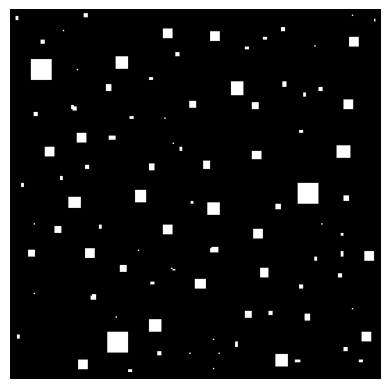

Erosão com [[0, 1, 0], [1, 1, 1], [0, 1, 0]]:


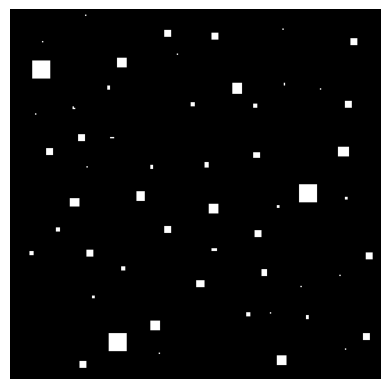

Dilatação com [[0, 1, 0], [1, 1, 1], [0, 1, 0]]:


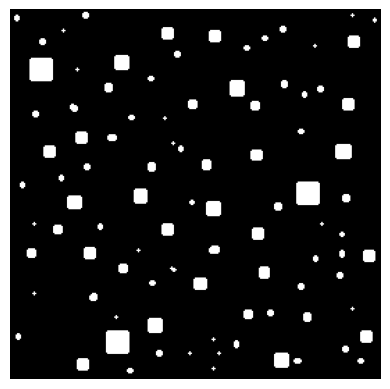

Abertura com [[0, 1, 0], [1, 1, 1], [0, 1, 0]]:


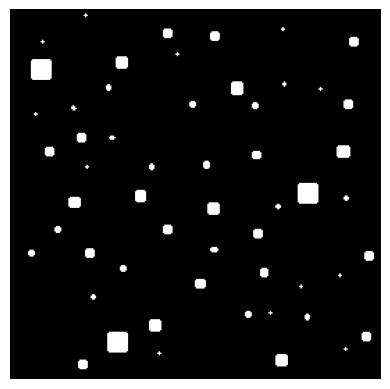

Fechamento com [[0, 1, 0], [1, 1, 1], [0, 1, 0]]:


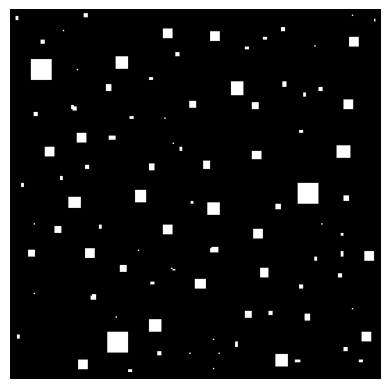

Erosão com [[1, 1, 1], [1, 1, 1], [1, 1, 1]]:


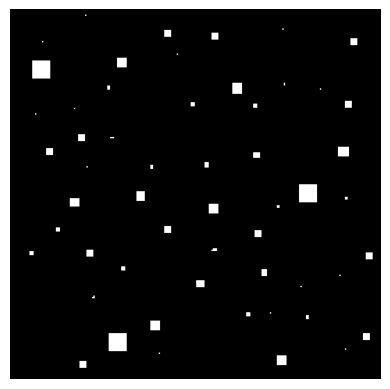

Dilatação com [[1, 1, 1], [1, 1, 1], [1, 1, 1]]:


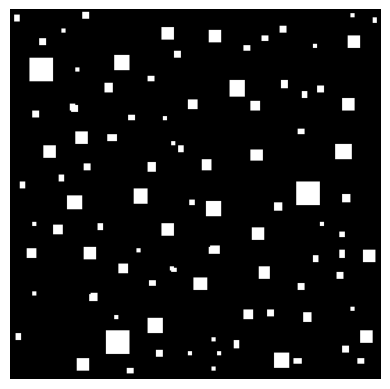

Abertura com [[1, 1, 1], [1, 1, 1], [1, 1, 1]]:


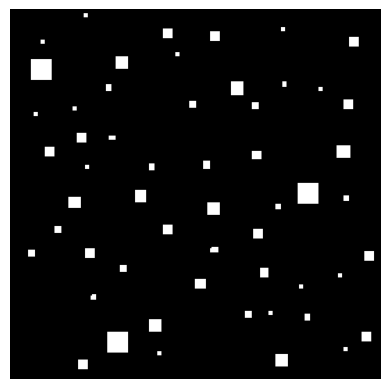

Fechamento com [[1, 1, 1], [1, 1, 1], [1, 1, 1]]:


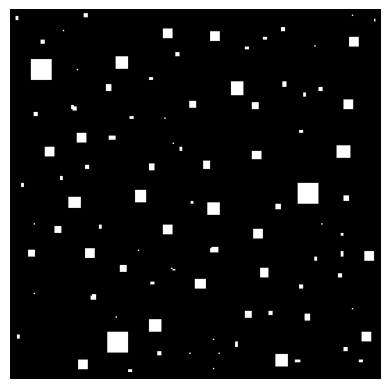

In [75]:
images = [
    'imageA',
    'imageB',
    'imageC'
]

structuringElements = [
    [[0, 1, 0], [1, 1, 1], [0, 1, 0]],
    [[1, 1, 1], [1, 1, 1], [1, 1, 1]]
]

for imageName in images:
    image = cv2.cvtColor(cv2.imread(f'{FILES_DIR}/original/{imageName}.bmp'), cv2.COLOR_RGB2GRAY)
    ret, image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    	
    print(f'Imagem "{imageName}" Original:')
    showImage(image)

    for i, structuringElement in enumerate(structuringElements):
        print(f'Erosão com {structuringElement}:')
        showSaveImage(erosion(image, structuringElement), imageName, f'{i}_erosion')

        print(f'Dilatação com {structuringElement}:')
        showSaveImage(dilation(image, structuringElement), imageName, f'{i}_dilation')

        print(f'Abertura com {structuringElement}:')
        showSaveImage(opening(image, structuringElement), imageName, f'{i}_opening')

        print(f'Fechamento com {structuringElement}:')
        showSaveImage(closing(image, structuringElement), imageName, f'{i}_closing')